In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Reading the user_engagement file
df_engagement = pd.read_csv("takehome_user_engagement.csv",parse_dates=['time_stamp'])

In [3]:
# Viewing its head
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
# Getting the info of the df_engagement
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
df_engagement['user_id'].nunique()

8823

### User_Engagement dataframe  has no missing values & out of 207917 values, only 8823 are unique.

In [6]:
# Normalizing the values of time_stamp column to midnight.
df_engagement['time_stamp'] = df_engagement['time_stamp'].dt.normalize()

In [7]:
# Checking various values of 'visited' column of dataframe df_engagement
df_engagement['visited'].unique()

array([1], dtype=int64)

### Since visited column has only 1 as entries, we can count them to determine if a user is an adopted user  (i.e. has logged into the product on three separate days in atleast one 7 day period ) or not.

In [8]:
# instantiating a set with values of column 'user_id'
s1 = set(df_engagement['user_id'])

In [9]:
# Reading User's csv file
df_users = pd.read_csv("takehome_users.csv",parse_dates=['creation_time'])

In [10]:
# Getting the info of the df_users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [11]:
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [12]:
# instantiating a set with values of column 'object_id' where values of 'last_session_creation_time' are not nulls
s2 = set(df_users.loc[~(df_users['last_session_creation_time'].isna()),'object_id'])

In [13]:
# Calculating the difference of sets s2 and s1
s3 = s2 - s1

In [14]:
s3

set()

### From the above we can clearly see that column last_session_creation_time has missing values for those users for whom there is no data in the engagements table. Thus we need to remove all the rows with missing values for the last_session_creation_time column from the df_users dataframe.


In [15]:
# Dropping all the rows with NaN values in the 'last_session_creation_time' column
df_users.dropna(axis=0,subset=['last_session_creation_time'],inplace=True)

In [16]:
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN
12,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0


In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [18]:
df_users['invited_by_user_id'].value_counts()

4612.0     10
11770.0     9
2308.0      9
10628.0     8
6808.0      8
           ..
11144.0     1
6868.0      1
9325.0      1
10.0        1
10872.0     1
Name: invited_by_user_id, Length: 2229, dtype: int64

### From the above we can see that invited_by_user_id won't be a useful feature for predicting the whether a user is an 'adopted user' or not, as no single user_id has significant influence.

In [19]:
# Removing column 'invited_by_user_id' from users dataframe
df_users.drop(columns=['invited_by_user_id'],inplace=True)

In [20]:
# Deleting the 'name' column of df_users as it doesn't offer any info.
df_users.drop(columns=['name'],inplace=True)

In [21]:
# lets have object_id as the index of df_users
df_users.set_index('object_id',inplace=True)

In [22]:
df_users.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
object_id,,,,,,,
1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11
2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94
4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1
5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193


In [23]:
# Defining function response_variable to determine if the user is an adopted_user or not. 
def response_var(df):
    df_temp = (df.groupby('user_id').rolling('7D',on='time_stamp'))['visited'].count() >= 3 # Creating a multi-index series
    df_temp =  df_temp.reset_index(level='time_stamp')# Converting the multi-index series to single index series
    df_temp =  df_temp.groupby('user_id')['visited'].any() # Returns boolean series to determine whether a user is adopted
    return (df_temp.astype('int'))  # or not

In [24]:
# Determining the class of each observation
S = response_var(df_engagement)

In [25]:
# Visualizing the head of  the series S
S.head()

user_id
1    0
2    1
3    0
4    0
5    0
Name: visited, dtype: int32

In [26]:
len(S)

8823

In [27]:
# once again determining whether index of Series S1 & that of df_users have same enteries
s1 = set(df_users.index) - set(S.index)

In [28]:
s1

set()

In [29]:
# Creating the 'adopted user' column of the dataframe df_users
df_users['adopted_user'] = S

In [30]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               8823 non-null   datetime64[ns]
 1   email                       8823 non-null   object        
 2   creation_source             8823 non-null   object        
 3   last_session_creation_time  8823 non-null   float64       
 4   opted_in_to_mailing_list    8823 non-null   int64         
 5   enabled_for_marketing_drip  8823 non-null   int64         
 6   org_id                      8823 non-null   int64         
 7   adopted_user                8823 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(2)
memory usage: 585.9+ KB


In [31]:
df_users.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
object_id,,,,,,,,
1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0
2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1
3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,0
4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,0
5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,0


In [32]:
# Converting the last_session_creation_time to date_time object
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'],unit='s')

In [33]:
# Creating the time_dff column which represents,for how long the user was active on the product,
# as the time delta object in seconds.
df_users['time_diff'] = (df_users['last_session_creation_time'] - df_users['creation_time']).astype('timedelta64[s]')

In [34]:
df_users.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,time_diff
object_id,,,,,,,,,
1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0,0.0
2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,11750400.0
3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0,0.0
4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0,86400.0
5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0,432000.0


In [35]:
# Removing 'creation_time' & 'last_session_creation_time' columns as they have served their purpose
df_users.drop(columns=['creation_time','last_session_creation_time'],inplace=True)

In [36]:
# Storing only the domain names in email column
df_users['email'] = df_users['email'].map(lambda s : (s.split('@'))[1])

In [37]:
df_users.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,time_diff
object_id,,,,,,,
1,yahoo.com,GUEST_INVITE,1,0,11,0,0.0
2,gustr.com,ORG_INVITE,0,0,1,1,11750400.0
3,gustr.com,ORG_INVITE,0,0,94,0,0.0
4,yahoo.com,GUEST_INVITE,0,0,1,0,86400.0
5,yahoo.com,GUEST_INVITE,0,0,193,0,432000.0


In [38]:
df_users['email'].value_counts().head(15)

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
hotmail.com        803
oqpze.com            2
xvnbr.com            2
xybhi.com            2
mumdc.com            2
luque.com            2
pafbm.com            1
bhisp.com            1
vkmdh.com            1
kgycl.com            1
Name: email, dtype: int64

In [39]:
# Getting the top 6 domain names of the email columns which seem to be significant
imp_domain = df_users['email'].value_counts().index[:6]

In [40]:
# Displaying imp domains
imp_domain

Index(['gmail.com', 'yahoo.com', 'jourrapide.com', 'gustr.com', 'cuvox.de',
       'hotmail.com'],
      dtype='object')

In [41]:
df_users['email'] = df_users['email'].map(lambda s : s if s in imp_domain else 'other')

In [42]:
df_users.head()

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,time_diff
object_id,,,,,,,
1,yahoo.com,GUEST_INVITE,1,0,11,0,0.0
2,gustr.com,ORG_INVITE,0,0,1,1,11750400.0
3,gustr.com,ORG_INVITE,0,0,94,0,0.0
4,yahoo.com,GUEST_INVITE,0,0,1,0,86400.0
5,yahoo.com,GUEST_INVITE,0,0,193,0,432000.0


In [43]:
# Getting value_counts of the creation_source
df_users['creation_source'].value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [44]:
# Converting the object columns into dummies
df_users = pd.get_dummies(df_users)

In [45]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            8823 non-null   int64  
 1   enabled_for_marketing_drip          8823 non-null   int64  
 2   org_id                              8823 non-null   int64  
 3   adopted_user                        8823 non-null   int32  
 4   time_diff                           8823 non-null   float64
 5   email_cuvox.de                      8823 non-null   uint8  
 6   email_gmail.com                     8823 non-null   uint8  
 7   email_gustr.com                     8823 non-null   uint8  
 8   email_hotmail.com                   8823 non-null   uint8  
 9   email_jourrapide.com                8823 non-null   uint8  
 10  email_other                         8823 non-null   uint8  
 11  email_yahoo.com                     8823 n

In [46]:
df_users_1 = df_users.copy()

### Deleting 'email_other' & 'creation_source_PERSONAL_PROJECTS' (as they are least imp ) to remove linear dependence among columns

In [47]:
df_users.drop(columns=['email_other','creation_source_PERSONAL_PROJECTS'],inplace=True)

In [48]:
# Getting the value counts of the 'org_id' column 
df_users['org_id'].value_counts()

0      228
1      172
2      150
3      125
4      122
      ... 
396      6
322      6
397      5
386      4
416      2
Name: org_id, Length: 417, dtype: int64

### The org_id is a categorical column and there  is no group of categories which is significant and incorporating all its categories as features would likely result in dimensionality explosion, hence it's better to drop this column.

In [49]:
df_users.drop(columns='org_id',inplace=True)

In [50]:
# Normalizing the column 'time_diff' for use in MI
df_users['time_diff'] = (df_users['time_diff'] - (df_users['time_diff'].mean()))/(df_users['time_diff'].std(ddof=0))

In [51]:
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,time_diff,email_cuvox.de,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_yahoo.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,,,
1,1,0,0,-0.410797,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0.532573,0,0,1,0,0,0,0,1,0,0
3,0,0,0,-0.410797,0,0,1,0,0,0,0,1,0,0
4,0,0,0,-0.403861,0,0,0,0,0,1,1,0,0,0
5,0,0,0,-0.376114,0,0,0,0,0,1,1,0,0,0


### For Feature Importance or Feature Selection, we would be using Mutual Information (MI)

In [52]:
from sklearn.feature_selection import mutual_info_classif 

In [53]:
X = df_users.drop(columns='adopted_user')
y = df_users['adopted_user']

In [54]:
MI = mutual_info_classif(X,y,random_state=42)

In [55]:
MI_S = pd.Series(MI,index=X.columns)

In [56]:
# Feature importance of various features.
MI_S

opted_in_to_mailing_list              0.012654
enabled_for_marketing_drip            0.003008
time_diff                             0.393698
email_cuvox.de                        0.000000
email_gmail.com                       0.000000
email_gustr.com                       0.003900
email_hotmail.com                     0.002161
email_jourrapide.com                  0.001861
email_yahoo.com                       0.000511
creation_source_GUEST_INVITE          0.000000
creation_source_ORG_INVITE            0.004825
creation_source_SIGNUP                0.002282
creation_source_SIGNUP_GOOGLE_AUTH    0.000000
dtype: float64

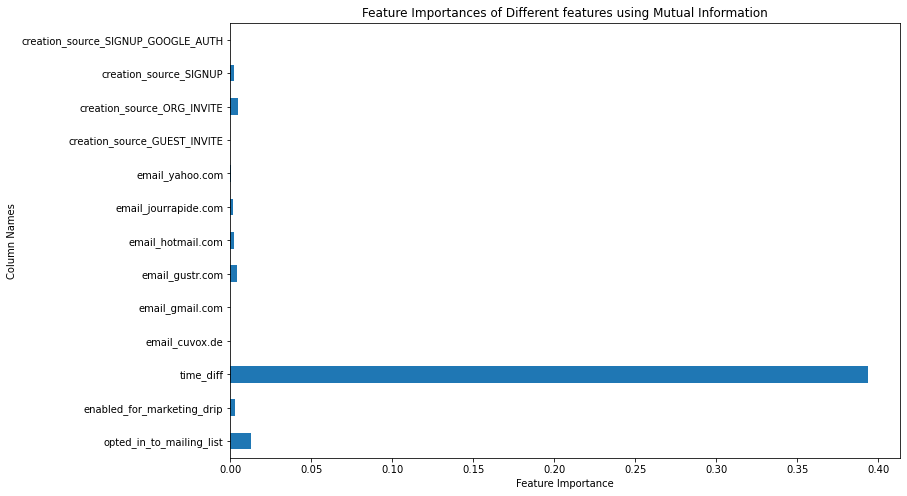

In [57]:
# Plotting the Feature_Importance of various features
plt.figure(figsize=(12,8))
MI_S.plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Column Names')
plt.title('Feature Importances of Different features using Mutual Information')
plt.show()

### Thus from above figure we can clearly see that the most important feature is time_diff, which measures for how long the user logged into the product, followed by whether the user is on the mailing list of the company and so on.
